In [5]:
import pandas as pd                      # For data manipulation
import numpy as np                       # For numerical operations
import matplotlib.pyplot as plt          # For plotting the ROC curve
from sklearn.model_selection import train_test_split   # To split dataset
from sklearn.preprocessing import StandardScaler        # To scale features
from sklearn.linear_model import LogisticRegression     # For binary classification
from sklearn.metrics import roc_curve, auc, roc_auc_score  # For ROC & AUC metrics

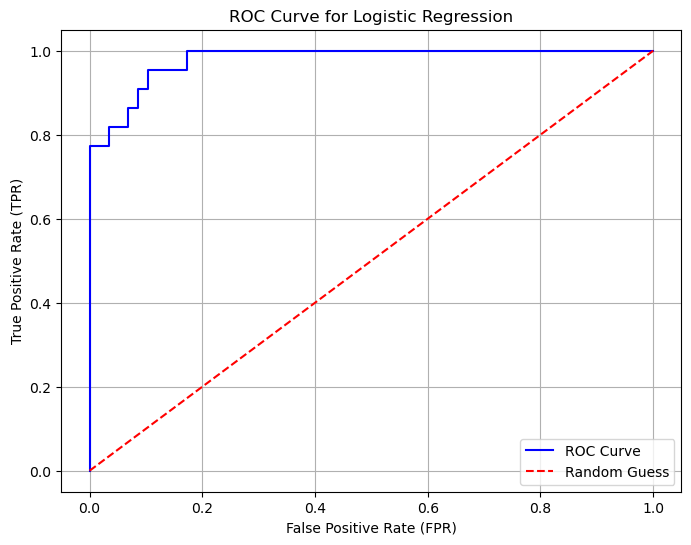

AUC Score (using auc): 0.9788
AUC Score (using roc_auc_score): 0.9788401253918495


In [15]:
#Load data from CSV into a DataFrame for analysis
df = pd.read_csv(r"C:\Users\ASUS\Documents\pythonStack\DS_PR\Social_Network_Ads.csv")

# Step 3: Drop irrelevant columns
# 'User ID' is unique for each user and not useful for prediction
df = df.drop('User ID', axis=1)

# Step 4: Encode categorical variable
# Convert 'Gender' to numeric: Male = 0, Female = 1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Step 5: Split features and target
# Features (X): predictors; Target (y): class label 'Purchased'
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Step 6: Train-test split
# Split the data into 80% training and 20% testing for evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Step 7: Feature Scaling
# Scale features for better model convergence and performance
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Step 8: Train Logistic Regression model
# Create and train the logistic regression classifier
# It learns weights to best separate classes using sigmoid function
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 9: Get predicted probabilities
# Get probability predictions for class 1 (Purchased) from the model
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Step 10: Compute ROC curve values
# Calculate False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Step 11: Plot ROC Curve
# Visualize how well the model distinguishes between classes
# Step 11: Plot ROC Curve
# Visualize how well the model distinguishes between classes
plt.figure(figsize=(8, 6))

# Blue line: ROC curve showing the trade-off between TPR (True Positive Rate) and FPR (False Positive Rate)
# The curve represents the model's performance at various thresholds (from 0 to 1)
plt.plot(fpr, tpr, color='blue', label='ROC Curve')  # ROC Curve line

# Red dashed line: Random guess line where TPR = FPR
# This diagonal line (slope = 1) represents a random classifier with no discriminative power
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')  # Diagonal reference

# X-axis represents the False Positive Rate (FPR)
# Y-axis represents the True Positive Rate (TPR)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


# Step 12: Calculate and print AUC Score
# AUC is the area under ROC curve — higher means better model
roc_auc = auc(fpr, tpr)
print(f"AUC Score (using auc): {roc_auc:.4f}")
print("AUC Score (using roc_auc_score):", roc_auc_score(y_test, y_probs))
 

In [13]:

# ------------------------------------------------------------------------
# ROC Curve and AUC Concepts:

# What is ROC Curve?
# ROC (Receiver Operating Characteristic) Curve is a graphical plot used to evaluate
# the performance of a binary classification model at all classification thresholds.

# Why is it used?
# It helps us understand how well the model is distinguishing between two classes
# by showing the trade-off between sensitivity (True Positive Rate) and
# fall-out (False Positive Rate).

# How does it work?
# - The model outputs probabilities instead of binary predictions.
# - For each threshold (e.g., 0.1, 0.2, ..., 0.9), classify examples as positive if
#   the probability is above the threshold.
# - Compute TPR = TP / (TP + FN)
# - Compute FPR = FP / (FP + TN)
# - Plot TPR vs FPR

# What is AUC?
# AUC stands for Area Under the Curve.
# It summarizes the ROC curve as a single value, showing the overall ability of
# the model to distinguish between the classes.

# Interpretation of AUC:
# - AUC = 1.0 → Perfect model
# - AUC = 0.5 → No better than random guessing
# - Higher AUC means better model performance

# Key Takeaways:
# - ROC Curve shows model performance at all thresholds
# - AUC gives a threshold-independent measure of how good the classifier is
# - It is especially useful for imbalanced classification problems